In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize':(15,6)})
plt.rcParams.update({'font.size':18})

In [2]:
df = pd.read_csv('dataset/customer_segmentation_traindata.csv')
df.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
## Checking the Ever_Married column for missing values
def married_checker(df):
    if df.Ever_Married != 'Yes' and df.Ever_Married != 'No':
        if df.Age <= 22 or df.Family_Size == 1:
            return 'No'
        else:
            return np.nan
    else:
        if df.Ever_Married == 'Yes':
            return 'Yes'
        else:
            return 'No'


df.Ever_Married = df.apply(lambda x: married_checker(x), axis=1)
df.info()
# temp = df[df.Ever_Married.isnull()]
# edit = temp[(temp.Age <= 22)|(temp.Family_Size == 1)]
# edit['Ever_Married'] = 'No'
# edit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7976 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
## categorize null Profession as "unknown"
l = ['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing']
df.Profession = df.Profession.apply(lambda x: 'unknown' if x not in l else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7976 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
## omitting the Ever_Married and Graduated null columns
new_df = df[~((df.Ever_Married.isnull())|(df.Graduated.isnull()))]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7902 non-null   int64  
 1   Gender           7902 non-null   object 
 2   Ever_Married     7902 non-null   object 
 3   Age              7902 non-null   int64  
 4   Graduated        7902 non-null   object 
 5   Profession       7902 non-null   object 
 6   Work_Experience  7102 non-null   float64
 7   Spending_Score   7902 non-null   object 
 8   Family_Size      7583 non-null   float64
 9   Var_1            7826 non-null   object 
 10  Segmentation     7902 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 740.8+ KB


In [7]:
# instead of numeric values, we will categorize the working experience
  # 0~3, 4~6, 7~9, 10~, unknown
# use the KNN imputer on the family size column and round to the nearest integer

In [9]:
new_df.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


/Users/yamato0615/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


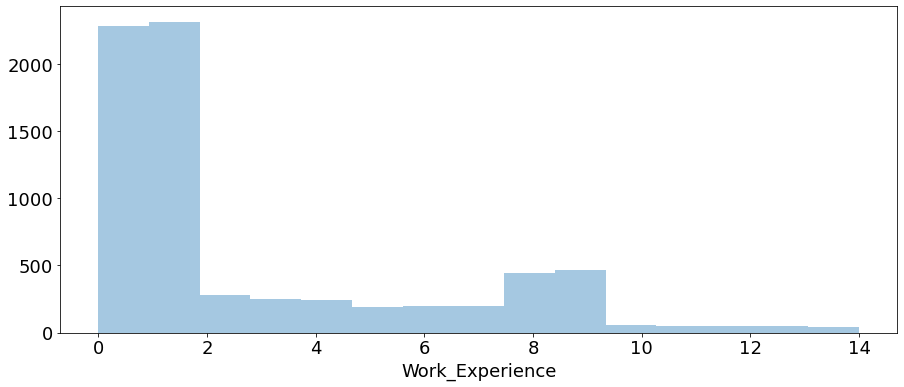

In [8]:
sns.distplot(new_df['Work_Experience'],bins=15, kde=False)
plt.show()

### Making the work experience into categorical columns

In [10]:
 # 0~3, 4~6, 7~9, 10~, unknown
def work_experience(x):
    if x >= 10:
        return 'Advanced'
    elif x >= 7:
        return 'High'
    elif x >= 4:
        return 'Intermediate'
    elif x>= 0:
        return 'Entry'
    else:
        return 'unknown'

new_df['Work_Experience'] = new_df['Work_Experience'].apply(lambda x: work_experience(x))

/Users/yamato0615/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
new_df.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,Entry,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,unknown,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,Entry,Low,1.0,Cat_6,B


### Filling in the Family Size using KNN Imputer